# Домашнее задание №3 - Реализация базового варианта линейной регрессии

## Часть 1. Ваша реализация (60 баллов)

В этой части домашки вам предстоит **реализовать класс LinearRegressionSGD**, который обучает линейную регрессию методом стохастического градиентного спуска (SGD). Класс должен поддерживать **L1, L2 и Elastic Net регуляризацию**. Помимо этого, необходимо реализовать методы для **визуализации процесса обучения**: график функции потерь по эпохам и распределение ошибок на той или иной эпохе.

Ниже представлен шаблон кода с пропусками, которые необходимо заполнить.


* вычисление лосса (15 баллов)
* изменения в функции fit (25 баллов)
* predict (5 баллов)
* графики (15 баллов)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000, reg_type=None, reg_lambda=0.01, alpha=0.5):
        """
        Initialize the Linear Regression model with SGD.
        :param lr: Learning rate
        :param epochs: Number of training epochs
        :param reg_type: Regularization type ('l1', 'l2', 'elastic_net', or None)
        :param reg_lambda: Regularization strength
        :param alpha: Mixing parameter for elastic net (0: L2, 1: L1)
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.alpha = alpha
        self.theta = None
        self.loss_history = []
        self.error_history = []
    
    def _compute_loss(self, X, y):
        """Compute MSE loss with regularization."""
        m = len(y)
        predictions = X.dot(self.theta)
        loss = # YOUR CODE HERE
        
        if self.reg_type == 'l2':
            loss += self.reg_lambda * np.sum(self.theta ** 2) / 2
        elif self.reg_type == 'l1':
            # YOUR CODE HERE
        elif self.reg_type == 'elastic_net':
            # YOUR CODE HERE
        
        return loss
    
    def fit(self, X, y):
        """Train the model using stochastic gradient descent."""
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for epoch in range(self.epochs):
            errors = []
            for i in range(m):
                idx = np.random.randint(0, m)
                xi, yi = X[idx], y[idx]
                prediction = np.dot(xi, self.theta)
                error = prediction - yi
                errors.append(error)
                
                # Compute gradient
                gradient = xi * error
                
                # Apply regularization
                # YOUR CODE HERE
                
                # Update weights
                # YOUR CODE HERE
                
            # Compute loss at the end of each epoch
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            self.error_history.append(errors)
            
    def predict(self, X):
        """Make predictions using the trained model."""
        return # YOUR CODE HERE
    
    def plot_loss(self):
        """Plot the loss distribution over epochs."""
        # YOUR CODE HERE
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss distribution over epochs')
        plt.legend()
        plt.show()
    
    def plot_error_distribution(self, epoch):
        """Plot the distribution of errors for all points at each epoch."""
        # YOUR CODE HERE
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f'Error Distribution at Epoch {epoch}')
        plt.legend()
        plt.show()


## Часть 2. Проверяем вашу реализацию (25 баллов)

Теперь для полученного класса вам нужно будет посмотреть, **как ведет себя регрессия для разных вариантов регуляризации**. Советуем рассмотреть несколько наборов значений для каждого вида регуляризации, а также посмотреть на несколько значений learning rate. 
 
Ваша цель - **понять какие значения лучше или хуже подходят** в случае ваших данных.

В качестве данных вам предлагается использовать сгенерированные выборки. Ниже представлен код для генерации.

In [38]:
sample_size = 500

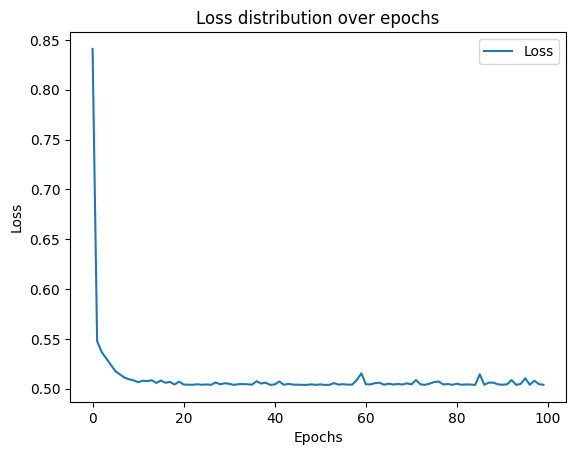

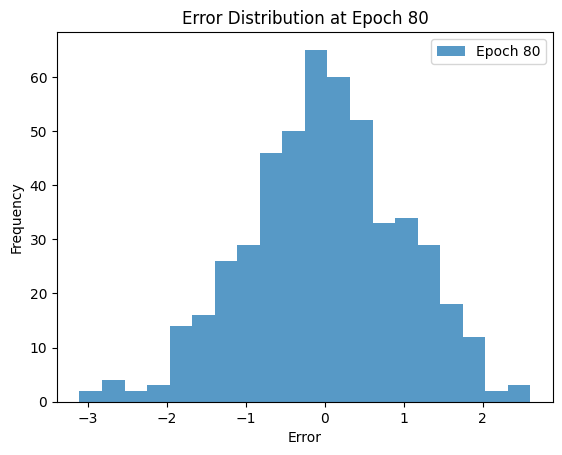

In [43]:
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

In [ ]:
# YOUR CODE HERE

## Часть 3. (15 баллов)

**Разбейте ваши данные** на две части в процентном соотношении 80/20, используя функцию `train_test_split` из `scikit-learn`. Первую часть используйте как **тренировочную выборку**, а а вторую - как **тестовую**.

Посмотрите, **как меняются значения лоссов** на тренировочной и тестовой выборке в процессе обучения. Какие модели больше переобучаются, а какие меньше?

*Если вы не понимаете как разбить вашу выборку, посмотрите другой файл домашки `hw3_data_analysis.ipynb`*

In [ ]:
# YOUR CODE HERE

**Отлично! Вы дошли до конца этой сложной части третьей домашки!**

Вы уже поняли, что мы ждём ваши впечатления. Особенно важно то, сколько времени у вас заняла эта часть. Нравятся ли вам задания с собственной реализацией методов и классов?

## Давайте следующий вопрос

Вставьте картинку, которая ассоциируется с вашим **любимым путешествием**. Пусть это будут горы или озёра, или любимая кафешка за пределами города, или фотка дома с котом, где вы провели какое-нибудь лето. Что угодно, где вам было комфортно и от чего у вас возникают тёплые воспоминания.

In [3]:
#We travel for romance, we travel for architecture, and we travel to be lost.
#Ray Bradbury